# Word2Vec - 명사만 벡터화

In [1]:
from konlpy.tag import Okt
okt = Okt()

sentence = []

for i in range(5):
    with open("data/issue1/true/"+str(i)+".txt", mode = 'r',encoding='UTF8') as f:
        while True:   
            line = f.readline()
            if not line:
                break
            sentence.append(str(line).replace('\n',''))
    f.close()
    
for i in range(3):
    with open("data/issue1/false/"+str(i)+".txt", mode = 'r',encoding='UTF8') as f:
        while True:   
            line = f.readline()
            if not line:
                break
            sentence.append(str(line).replace('\n',''))
    f.close()
    
for i in range(5):
    with open("data/issue2/true/"+str(i)+".txt", mode = 'r',encoding='UTF8') as f:
        while True:   
            line = f.readline()
            if not line:
                break
            sentence.append(str(line).replace('\n',''))
    f.close()
    
for i in range(10):
    with open("data/issue2/false/"+str(i)+".txt", mode = 'r',encoding='UTF8') as f:
        while True:   
            line = f.readline()
            if not line:
                break
            sentence.append(str(line).replace('\n',''))
    f.close()
    
for i in range(5):
    with open("data/issue3/true/"+str(i)+".txt", mode = 'r',encoding='UTF8') as f:
        while True:   
            line = f.readline()
            if not line:
                break
            sentence.append(str(line).replace('\n',''))
    f.close()
    
for i in range(5):
    with open("data/issue3/false/"+str(i)+".txt", mode = 'r',encoding='UTF8') as f:
        while True:   
            line = f.readline()
            if not line:
                break
            sentence.append(str(line).replace('\n',''))
    f.close()

    
for i in range(len(sentence)) :
    sentence[i] = sentence[i].split('.')[:-1]
sentence = [okt.nouns(j) for i in sentence for j in i]

print(sentence)

C:\Users\dahyun\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


[['신천지', '집단', '감염', '코로나', '속도', '확산', '확진', '환자', '이동', '경로', '대한', '관심', '늘'], ['질병', '관리', '본부', '확진', '환자', '이동', '경로', '공개', '코로나', '알', '리미', '코로나', '맵', '우리동네', '코로나', '지도', '코로나', '코로나', '신천지', '위치', '알림', '등', '코로나', '확', '진자', '동선', '앱', '계속', '등장'], ['국내', '확', '진자', '이동', '동선', '방문', '시설', '이유', '혹시', '불안감'], ['확', '진자', '간', '동선', '해당', '건물', '등', '다시', '우려', '것'], ['코로나', '확', '진자', '우리', '생활', '반경', '확', '진자', '이야기', '분'], ['우선', '확', '진자', '방문', '장소', '시간', '체크', '것'], ['체외', '코로나', '바이러스', '생존', '기간', '자연', '상태', '정도', '것'], ['혹시', '확', '진자', '방문', '이후', '이내', '동선', '내', '장소', '방문', '질병', '관리', '본부', '콜센터', '나', '지역', '보건소', '연락'], ['질병', '관리', '본부', '휘하', '시도', '및', '군구', '역학', '조사', '반', '확진', '환자', '증상', '마스크', '착용', '여부', '노출', '등', '고려', '증상', '발생', '전', '접촉', '자의', '범위', '정'], ['코로나', '확', '진자', '증상', '시기', '유증', '상기', '이내', '접촉', '사람', '확', '진자', '폐쇄', '공간', '마스크', '기침', '경우', '공간', '사람', '등', '역학', '사관', '판단', '접촉', '분류', '자가', '격리', '조치'], ['마지막', '접촉', '일', 

In [2]:
stopword = []

with open("data/stopword.txt", mode = 'r',encoding='UTF8') as f:
    while True:   
        line = f.readline()
        if not line:
            break
        stopword.append(str(line).replace('\n','').split('\t')[0])
f.close()

for i in range(len(sentence)) :
    for k in range(len(sentence[i])) :
        if k in stopword :
            sentence[i].remove(k)

In [3]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

def plotgraph(vocabs,xs,ys) :
    plt.figure(figsize=(8,6))
    plt.scatter(xs,ys,marker='o')
    
    for i,v in enumerate(vocabs):
        plt.annotate(v,xy=(xs[i],ys[i]))
        
model = Word2Vec(sentence, size = 100, window = 2, min_count = 2, workers = 1, sg = 0)

word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

C:\Users\dahyun\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

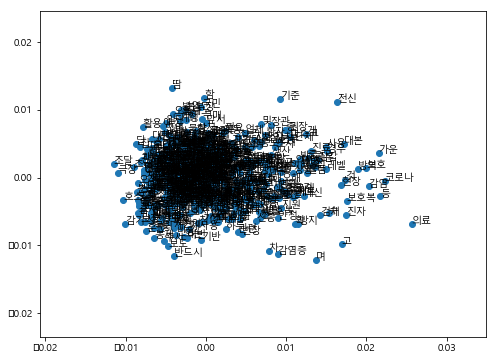

In [5]:
plotgraph(vocabs,xs,ys)

In [6]:
issue1_true = ['그렇기 때문에 코로나19 확진자와 가까운 거리에서 대화하거나 식사를 함께하지 않은 이상, 한 공간에 있었다는 것만으로 감염 가능성을 논하기엔 무리가 있는 것이죠',
              '즉, 확진자가 지나간 곳에 갔거나 들렀다고 해서 무조건 바이러스에 감염되지는 않는다는 얘기다',
              "의심환자가 확진자 동선에 방문한 시기가 '소독 이후'라면 감염 가능성은 거의 없다고 봅니다",
              '그렇기 때문에 접촉자의 ‘접촉자’는 감염 우려가 없으므로, 접촉자와 거주 또는 근무 공간에 같이 있었다는 이유만으로 감염될 것이라는 불안감을 가질 필요는 없습니다']

issue1_false = ['그 확진자 확진 판정 전에 간 건 아니어도 그 건물 안에 균이 있지 않을까도 싶고','모든 사람들이 확진자 동선을 파악할 수 있는 것도 아니고, 가게가 주체적으로 폐쇄해야 한다']

issue2_true = ['3월 내 레벨D 방호복 180만개, 방역용 마스크(N95) 200만개 등을 추가 확보할 계획이며 4월 이후에도 국내 생산업체 지원 등을 통해 방호복 250만개, 방역용 마스크 300만개 이상을 확보할 방침이다',
              '정부는 보도에서 언급된 사례에 대해 면밀히 조사하여, 코로나19 예방 및 치료를 위해 헌신한 의료진이 방역물품을 지원받지 못하거나, 또 본인의 희망에도 불구하고 감염검사를 받지 못하는 불합리한 사례가 발생하지 않도록 조치하겠습니다',
              '이에 실제로는 현장에서 보호구 수량이 부족한 경우가 아직 없다는 설명이다']

issue2_false = ['지금까지 코로나19 치료 중 감염된 의료진만 240여 명, 부족한 의료장비와 불안을 해소할 대책이 필요합니다',
               '코로나19 사태가 길어지면서 방역물품도 동이 나 확진자나 유증상자를 대하는 의료진 말고는 수술복과 비닐이 전부입니다',
               '의료진들이 방호복과 마스크 부족으로 도와달라고 절규를 해도 외면하고 있다',
               '의료진 방호복 부족으로 비닐옷 입고 환자치료',
               '방호복은 중국에 퍼주고 현실은 마스크와 방호복 보안경도 부족',
               '대구 의료진들이 의료용 마스크 부족, 방호복 부족 호소하니',
               '방호복이 부족하면 의료진이 움직일 수 있겠냐']

issue3_true = ['전신보호복을 착용해야 하는 의료진에게는 전신보호복을 계속 지원하고 있습니다',
              '권 부본부장은 "호흡기 검체를 채취할 때에는 전신보호복 레벨 D 또는 긴팔 가운 중에서 선택해 착용하는데, 단순히 긴팔 가운이 아니라 가운 세트"라며 "여기에 장갑이나 보안경, 호흡기 보호구 등이 같이 포함된 것으로 이를 통해 의료진 보호가 가능하다"고 강조했다',
              '권 부본부장은 "호흡기 검체를 채취할 때에는 전신보호복 레벨 D 또는 긴팔 가운 중에서 선택해 착용하는데, 단순히 긴팔 가운이 아니라 가운 세트"라며 "여기에 장갑이나 보안경, 호흡기 보호구 등이 같이 포함된 것으로 이를 통해 의료진 보호가 가능하다"고 강조했다']

issue3_false = ['대한공보의협의회는 성명서를 내고 "의료진 감염 방지 없이는 코로나19 방역도 없다"면서 "의료진 감염을 방지하기 위한 기본적 보호장구를 의료진이 아닌 행정상 권고로 결정돼 아쉽다"고 지적했다',
               '"정부에 아무런 보호장비 없이 의료인을 사지로 내몰 권리가 있느냐"고 따져물은 전라남도의사회는 "(가운만 갈아입어도) 감염의 우려가 없고 위험하지 않다고 생각한다면 지금 당장 공무원을 동원해 의사의 지사하에 직접 검체를 채취하라"고 목소리를 높였다']

issue1_true = [okt.nouns(i) for i in issue1_true]
issue1_false = [okt.nouns(i) for i in issue1_false]
issue2_true = [okt.nouns(i) for i in issue2_true]
issue2_false = [okt.nouns(i) for i in issue2_false]
issue3_true = [okt.nouns(i) for i in issue3_true]
issue3_false = [okt.nouns(i) for i in issue3_false]

for i in range(len(issue1_true)) :
    for k in range(len(issue1_true[i])) :
        if k in stopword :
            issue1_true[i].remove(k)
for i in range(len(issue1_false)) :
    for k in range(len(issue1_false[i])) :
        if k in stopword :
            issue1_false[i].remove(k)
for i in range(len(issue2_true)) :
    for k in range(len(issue2_true[i])) :
        if k in stopword :
            issue2_true[i].remove(k)
for i in range(len(issue2_false)) :
    for k in range(len(issue2_false[i])) :
        if k in stopword :
            issue2_false[i].remove(k)
for i in range(len(issue3_true)) :
    for k in range(len(issue3_true[i])) :
        if k in stopword :
            issue3_true[i].remove(k)
for i in range(len(issue3_false)) :
    for k in range(len(issue3_false[i])) :
        if k in stopword :
            issue3_false[i].remove(k)

In [7]:
issue1_true_vector = [[] for i in range(len(issue1_true))]
for i in range(len(issue1_true)) :
    for k in range(len(issue1_true[i])) :
        try:
            issue1_true_vector[i].append(word_vectors[issue1_true[i][k]])
        except KeyError : pass
issue1_true_vector = [sum(issue1_true_vector[i]) for i in range(len(issue1_true_vector))]

issue1_false_vector = [[] for i in range(len(issue1_false))]
for i in range(len(issue1_false)) :
    for k in range(len(issue1_false[i])) :
        try:
            issue1_false_vector[i].append(word_vectors[issue1_false[i][k]])
        except KeyError : pass
issue1_false_vector = [sum(issue1_false_vector[i]) for i in range(len(issue1_false_vector))]

issue2_true_vector = [[] for i in range(len(issue2_true))]
for i in range(len(issue2_true)) :
    for k in range(len(issue2_true[i])) :
        try:
            issue2_true_vector[i].append(word_vectors[issue2_true[i][k]])
        except KeyError : pass
issue2_true_vector = [sum(issue2_true_vector[i]) for i in range(len(issue2_true_vector))]

issue2_false_vector = [[] for i in range(len(issue2_false))]
for i in range(len(issue2_false)) :
    for k in range(len(issue2_false[i])) :
        try:
            issue2_false_vector[i].append(word_vectors[issue2_false[i][k]])
        except KeyError : pass
issue2_false_vector = [sum(issue2_false_vector[i]) for i in range(len(issue2_false_vector))]

issue3_true_vector = [[] for i in range(len(issue3_true))]
for i in range(len(issue3_true)) :
    for k in range(len(issue3_true[i])) :
        try:
            issue3_true_vector[i].append(word_vectors[issue3_true[i][k]])
        except KeyError : pass
issue3_true_vector = [sum(issue3_true_vector[i]) for i in range(len(issue3_true_vector))]

issue3_false_vector = [[] for i in range(len(issue3_false))]
for i in range(len(issue3_false)) :
    for k in range(len(issue3_false[i])) :
        try:
            issue3_false_vector[i].append(word_vectors[issue3_false[i][k]])
        except KeyError : pass
issue3_false_vector = [sum(issue3_false_vector[i]) for i in range(len(issue3_false_vector))]

In [8]:
from numpy import dot
from numpy.linalg import norm
import numpy as np

def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B))

print('===========Issue1===========')
for i in range(len(issue1_true_vector)) :
    for k in range(len(issue1_true_vector))[i+1:] :
        print(cos_sim(issue1_true_vector[i],issue1_true_vector[k]))
print('===========가짜뉴스===========')
for i in range(len(issue1_false_vector)) :
    for k in range(len(issue1_false_vector))[i+1:] :
        print(cos_sim(issue1_false_vector[i],issue1_false_vector[k]))
print('===========진짜&가짜뉴스===========')
for i in range(len(issue1_true_vector)) :
    for k in range(len(issue1_false_vector)) :
        print(cos_sim(issue1_true_vector[i],issue1_false_vector[k]))
print('')
print('===========Issue2===========')
for i in range(len(issue2_true_vector)) :
    for k in range(len(issue2_true_vector))[i+1:] :
        print(cos_sim(issue2_true_vector[i],issue2_true_vector[k]))
print('===========가짜뉴스===========')
for i in range(len(issue2_false_vector)) :
    for k in range(len(issue2_false_vector))[i+1:] :
        print(cos_sim(issue2_false_vector[i],issue2_false_vector[k]))
print('===========진짜&가짜뉴스===========')
for i in range(len(issue2_true_vector)) :
    for k in range(len(issue2_false_vector)) :
        print(cos_sim(issue2_true_vector[i],issue2_false_vector[k]))
print('')
print('===========Issue3===========')
for i in range(len(issue3_true_vector)) :
    for k in range(len(issue3_true_vector))[i+1:] :
        print(cos_sim(issue3_true_vector[i],issue3_true_vector[k]))
print('===========가짜뉴스===========')
for i in range(len(issue3_false_vector)) :
    for k in range(len(issue3_false_vector))[i+1:] :
        print(cos_sim(issue3_false_vector[i],issue3_false_vector[k]))
print('===========진짜&가짜뉴스===========')
for i in range(len(issue3_true_vector)) :
    for k in range(len(issue3_false_vector)) :
        print(cos_sim(issue3_true_vector[i],issue3_false_vector[k]))
print('')

===========Issue1===========
0.7802106
0.6950516
0.7190679
0.7023692
0.6565436
0.58424693
===========가짜뉴스===========
0.6157571
===========진짜&가짜뉴스===========
0.6496902
0.7389598
0.6365189
0.75342953
0.5733088
0.67224824
0.5732486
0.58742166

===========Issue2===========
0.8133349
0.7554172
0.70674175
===========가짜뉴스===========
0.79684407
0.7162201
0.7531558
0.5096044
0.7781622
0.7753562
0.7131866
0.70382345
0.51155204
0.7232188
0.7490437
0.7671119
0.67291325
0.8581453
0.84802336
0.5810585
0.8164879
0.8201291
0.6451876
0.6371536
0.89004844
===========진짜&가짜뉴스===========
0.8023672
0.81407136
0.7332958
0.71804744
0.63008493
0.7803673
0.7815956
0.8076196
0.8148762
0.6900001
0.7001118
0.4831818
0.7043562
0.747575
0.74918526
0.7215689
0.6447349
0.6072224
0.49227726
0.65113705
0.718935

===========Issue3===========
0.84680927
0.84680927
0.99999994
===========가짜뉴스===========
0.84627616
===========진짜&가짜뉴스===========
0.83371365
0.7632882
0.86479235
0.87654954
0.86479235
0.87654954



In [9]:
aissue1_true_vector = sum(issue1_true_vector)/len(issue1_true_vector)
aissue1_false_vector = sum(issue1_false_vector)/len(issue1_false_vector)

aissue2_true_vector = sum(issue2_true_vector)/len(issue2_true_vector)
aissue2_false_vector = sum(issue2_false_vector)/len(issue2_false_vector)

aissue3_true_vector = sum(issue3_true_vector)/len(issue3_true_vector)
aissue3_false_vector = sum(issue3_false_vector)/len(issue3_false_vector)

In [10]:
for i in range(len(issue1_true_vector)) :
    if cos_sim(issue1_true_vector[i],aissue1_true_vector) >= cos_sim(issue1_true_vector[i],aissue1_false_vector) :
        print("참")
    else : print("거짓")
print('------------------------------------')
for i in range(len(issue1_false_vector)) :
    if cos_sim(issue1_false_vector[i],aissue1_true_vector) >= cos_sim(issue1_false_vector[i],aissue1_false_vector) :
        print("참")
    else : print("거짓")
print('')

for i in range(len(issue2_true_vector)) :
    if cos_sim(issue2_true_vector[i],aissue2_true_vector) >= cos_sim(issue2_true_vector[i],aissue2_false_vector) :
        print("참")
    else : print("거짓")
print('------------------------------------')
for i in range(len(issue2_false_vector)) :
    if cos_sim(issue2_false_vector[i],aissue2_true_vector) >= cos_sim(issue2_false_vector[i],aissue2_false_vector) :
        print("참")
    else : print("거짓")
print('')

for i in range(len(issue3_true_vector)) :
    if cos_sim(issue3_true_vector[i],aissue3_true_vector) >= cos_sim(issue3_true_vector[i],aissue3_false_vector) :
        print("참")
    else : print("거짓")
print('------------------------------------')
for i in range(len(issue3_false_vector)) :
    if cos_sim(issue3_false_vector[i],aissue3_true_vector) >= cos_sim(issue3_false_vector[i],aissue3_false_vector) :
        print("참")
    else : print("거짓")
print('')

참
참
참
참
------------------------------------
거짓
거짓

참
참
참
------------------------------------
거짓
거짓
거짓
거짓
거짓
거짓
거짓

참
참
참
------------------------------------
거짓
거짓

